In [1]:
##from config import api_key
from citipy import citipy

import random
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.style.use("seaborn")

In [2]:
lat_zone = np.arange(-90,90,15)
lon_zone = np.arange(-200,200,15)
cities_df = pd.DataFrame()
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

In [3]:
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))
cities_df = cities_df.reset_index(drop=True)
cities_df.shape

(16200, 2)

In [4]:
cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)

C:\Users\e025515\AppData\Local\Continuum\anaconda3new\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\e025515\AppData\Local\Continuum\anaconda3new\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [5]:
clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df
clean_cities_df = clean_cities_df.drop_duplicates()
clean_cities_df.shape

(869, 2)

In [6]:
selected_cities = clean_cities_df.sample(500)

selected_cities = selected_cities.reset_index(drop=True)

In [7]:
base_url = "http://api.openweathermap.org/data/2.5/weather"

app_id = "25bc90a1196e6f153eece0bc0b0fc9eb"

params = { "appid" :app_id,"units":"metric" }

In [8]:


for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))

Retrieving weather information for alberdi,py
Retrieving weather information for zyryanka,ru


C:\Users\e025515\AppData\Local\Continuum\anaconda3new\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\e025515\AppData\Local\Continuum\anaconda3new\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\e025515\AppData\Local\Continuum\anaconda3new\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\e025515\AppData\Local\Continuum\anaconda3new\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back b

Retrieving weather information for ramsar,ir
Retrieving weather information for luangwa,zm
Retrieving weather information for aykhal,ru
Retrieving weather information for limbang,my
Retrieving weather information for leh,in
Retrieving weather information for san rafael,bo
Retrieving weather information for shirokiy,ru
Retrieving weather information for fereydun kenar,ir
Retrieving weather information for muhos,fi
Retrieving weather information for tavai,py
Retrieving weather information for santa eulalia del rio,es
Retrieving weather information for ingham,au
Retrieving weather information for chiredzi,zw
Retrieving weather information for chernyshevskiy,ru
Retrieving weather information for anadyr,ru
Retrieving weather information for lancaster,us
Retrieving weather information for palmer,us
Retrieving weather information for pandakan,ph
Retrieving weather information for taburi,ph
Retrieving weather information for uhlove,ua
Retrieving weather information for totness,sr
Retrieving we

Retrieving weather information for monroe,us
Retrieving weather information for adjumani,ug
Retrieving weather information for ahtopol,bg
Retrieving weather information for richton park,us
Retrieving weather information for scarborough,tt
Retrieving weather information for ajdabiya,ly
Retrieving weather information for tanda,ci
Retrieving weather information for sunrise manor,us
Retrieving weather information for sidi ali,dz
Retrieving weather information for puerto madero,mx
Retrieving weather information for rungata,ki
Retrieving weather information for yeletskiy,ru
Retrieving weather information for semnan,ir
Retrieving weather information for pacific grove,us
Retrieving weather information for potosi,bo
Retrieving weather information for kusk,af
Retrieving weather information for geraldton,au
Retrieving weather information for tubruq,ly
Retrieving weather information for mullaitivu,lk
Retrieving weather information for matara,lk
Retrieving weather information for solnechnyy,ru
Retr

Retrieving weather information for northam,au
Retrieving weather information for maturin,ve
Retrieving weather information for baruun-urt,mn
Retrieving weather information for concepcion,py
Retrieving weather information for yimnon,gr
Retrieving weather information for clinton,us
Retrieving weather information for vaini,to
Retrieving weather information for eyl,so
Retrieving weather information for canaries,lc
Retrieving weather information for kemijarvi,fi
Retrieving weather information for alaca,tr
Retrieving weather information for qalyub,eg
Retrieving weather information for puerto carreno,co
Retrieving weather information for brae,gb
Retrieving weather information for excelsior springs,us
Retrieving weather information for polunochnoye,ru
Retrieving weather information for cagayan de tawi-tawi,ph
Retrieving weather information for new norfolk,au
Retrieving weather information for biankouma,ci
Retrieving weather information for sindand,af
Retrieving weather information for dalbandi

In [9]:
selected_cities = selected_cities.dropna()

selected_cities.shape
selected_cities.to_csv("City_Weather_data.csv")

In [10]:
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

In [11]:
selected_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")

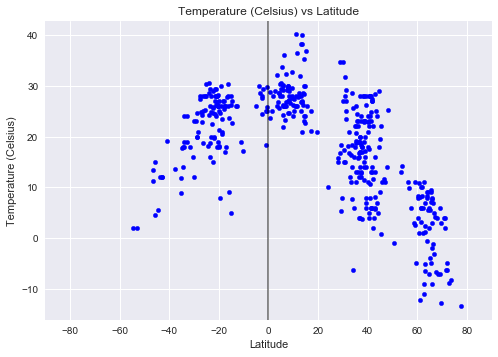

In [12]:
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.savefig("Temp_Latitude.png")
plt.show()

In [13]:
selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")

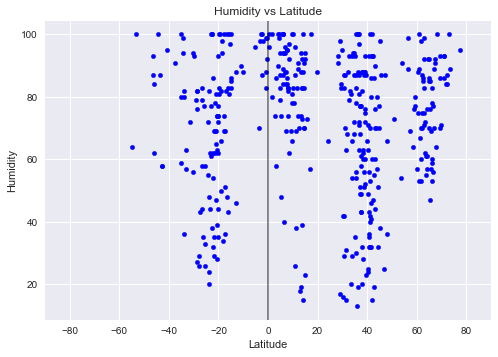

In [14]:
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity_Latitude.png")
plt.show()

In [15]:
selected_cities["Wind speed"] = pd.to_numeric(selected_cities["Wind speed"])
selected_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")

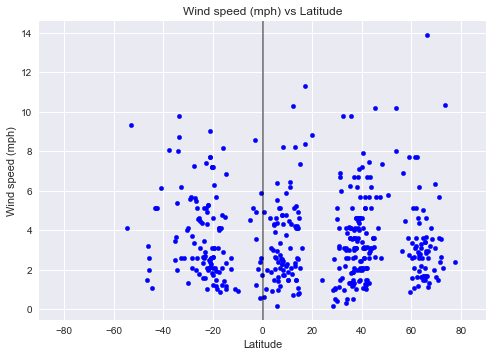

In [16]:
set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind_Speed_Latitude.png")
plt.show()

In [17]:
selected_cities["Cloudiness"] = pd.to_numeric(selected_cities["Cloudiness"])
selected_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")

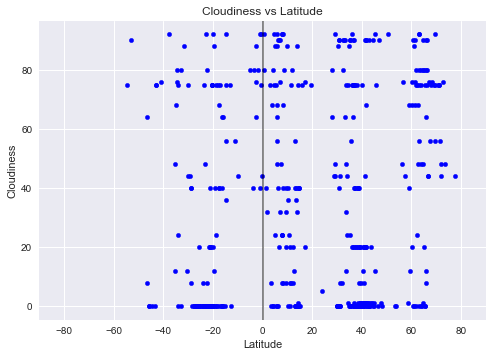

In [18]:
set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness_Latitude.png")
plt.show()

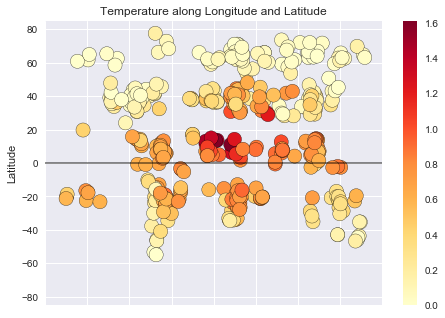

In [19]:
size_temp = np.round((((selected_cities.Temperature)/100)**2)*10,2)

selected_cities.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=200,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.ylim([-85,85])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)
plt.savefig("Ploting_graph_of_Cities.png")

plt.show()